In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-house-dataset/melb_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../input/melbourne-house-dataset/melb_data.csv')
data.describe()



,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

(array([7.573e+03, 4.692e+03, 9.830e+02, 2.390e+02, 6.200e+01, 1.700e+01,
        9.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([  85000.,  976500., 1868000., 2759500., 3651000., 4542500.,
        5434000., 6325500., 7217000., 8108500., 9000000.]),
 <BarContainer object of 10 artists>)

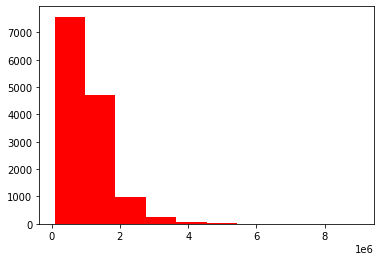

In [5]:
plt.hist(data.Price, color='red')

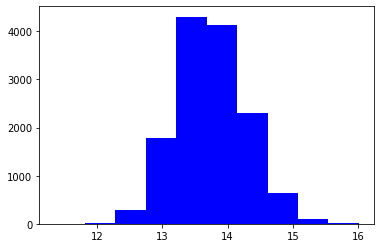

In [6]:
target = np.log(data.Price)
plt.hist(target, color='blue')
plt.show()

In [7]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = data[features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


In [8]:
X.isnull().sum()

Rooms         0
Bathroom      0
Landsize      0
Lattitude     0
Longtitude    0
dtype: int64

In [9]:
X.head()


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


In [10]:
y = data.Price

In [11]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0) 

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 1)
model.fit(train_x, train_y)


DecisionTreeRegressor(random_state=1)

In [13]:
from sklearn.metrics import mean_absolute_error
val_predictions = model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

250429.6127638684
